<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
C:\Users\user\AppData\Local\Temp\ipykernel_8612\2960946170.py:6: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("dataset_4yr\TPE_Grid_1000.csv")  # 改成你的檔案路徑


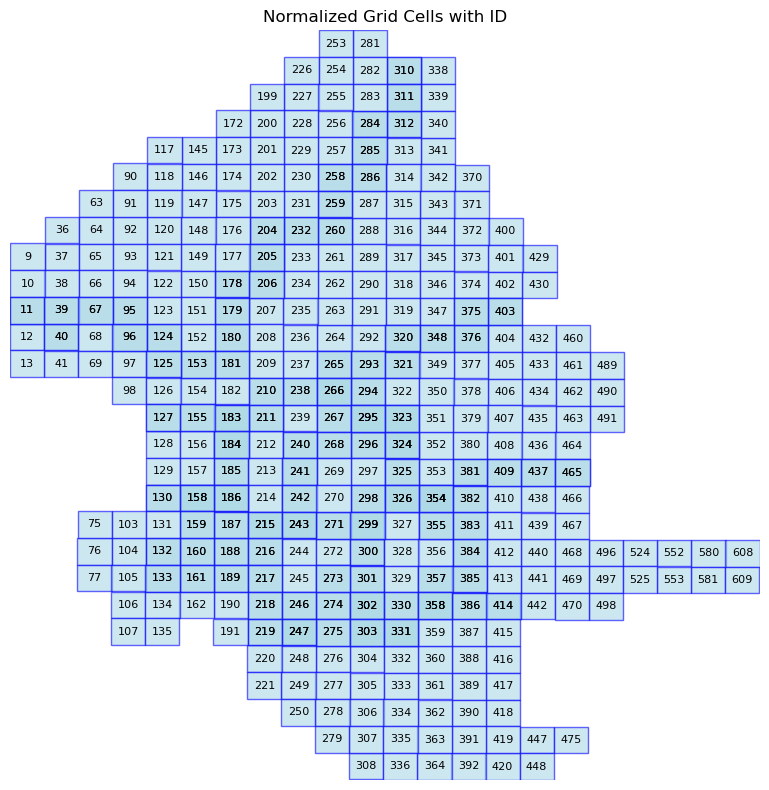

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

df = pd.read_csv("dataset_4yr\TPE_Grid_1000.csv") 

min_left = df['left_WGS84'].min()
min_bottom = df['bottom_WGS84'].min()
max_right = df['right_WGS84'].max()
max_top = df['top_WGS84'].max()

x_range = max_right - min_left
y_range = max_top - min_bottom

# Normalize
df['x1'] = (df['left_WGS84'] - min_left) / x_range
df['x2'] = (df['right_WGS84'] - min_left) / x_range
df['y1'] = (df['bottom_WGS84'] - min_bottom) / y_range
df['y2'] = (df['top_WGS84'] - min_bottom) / y_range


fig, ax = plt.subplots(figsize=(8, 8))

for _, row in df.iterrows():
    rect = patches.Rectangle(
        (row['x1'], row['y1']),
        row['x2'] - row['x1'],
        row['y2'] - row['y1'],
        linewidth=1,
        edgecolor='blue',
        facecolor='lightblue',
        alpha=0.6
    )
    ax.add_patch(rect)

    center_x = (row['x1'] + row['x2']) / 2
    center_y = (row['y1'] + row['y2']) / 2
    ax.text(center_x, center_y, str(row['id']), ha='center', va='center', fontsize=8)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_title("Normalized Grid Cells with ID")
plt.axis('off')
plt.tight_layout()
plt.show() # 28*22